In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import sumo as sm
import os
from traffic_initialization import *
import sys
from bs4 import BeautifulSoup
import tqdm

In [41]:
# initial xml encoding
minGap=0.1
N=1000

filedir = './xml_data/test1/'

netfile = 'test1.net.xml'
routefile = 'test1.rou.xml'
configfile = 'test1.sumocfg'
outpufile = 'test1.statistic.output.xml'

rtFl = RouteFile(filedir + routefile)

vtype = 'id0'

rtFl.setVehicleType(vtype, {
'accel' : "3.0",
'decel' : "6.0",
'length' : "4.0",
'minGap' : str(minGap),
'maxSpeed' : "50.0",
'sigma' : "0.5"
})

rtFl.setVehicleFlow(vtype, source='E0', dest='E3', num=N, dur=100, speed=13.89)
rtFl.save()

generateConfigFile(
filedir + configfile, 
netfile,
routefile,
output=['tripinfo']
)

loadConfig(filedir +'test1.sumocfg')
# xml reading
f_name = filedir + outpufile
with open(f_name, 'r') as file:
    data = file.read()
data = BeautifulSoup(data, "xml")
# average output flow is equal to N/T, where T – full model time
#ans = float(data('vehicleTripStatistics')[0]['duration'])
ans = N/float(data('performance')[0]['duration'])
print(ans)

Step #861.00 (0ms ?*RT. ?UPS, vehicles TOT 1000 ACT 0 BUF 0)                              
1.1614401858304297


In [2]:
def loss(minGap, road, N):

    # initial xml encoding

    filedir = './xml_data/test1/'

    netfile = 'test1.net.xml'
    routefile = 'test1.rou.xml'
    configfile = 'test1.sumocfg'
    outpufile = 'test1.statistic.output.xml'

    rtFl = RouteFile(filedir + routefile)

    vtype = 'id0'

    rtFl.setVehicleType(vtype, {
    'accel' : "3.0",
    'decel' : "6.0",
    'length' : "4.0",
    'minGap' : str(minGap),
    'maxSpeed' : "50.0",
    'sigma' : "0.5"
    })

    rtFl.setVehicleFlow(vtype, source='E0', dest='E3', num=N, dur=100, speed=30)
    rtFl.save()

    generateConfigFile(
    filedir + configfile, 
    netfile,
    routefile,
    output=['statistic']#, 'tripinfo']
    )

    loadConfig(filedir +'test1.sumocfg')
    # xml reading
    f_name = filedir + outpufile
    with open(f_name, 'r') as file:
        data = file.read()
    data = BeautifulSoup(data, "xml")
    # average output flow is equal to N/T, where T – full model time
    #ans = float(data('vehicleTripStatistics')[0]['duration'])
    ans = N/float(data('performance')[0]['duration'])

    return ans

In [75]:
loss(3.4, '1', 1000)

Step #1011.00 (0ms ?*RT. ?UPS, vehicles TOT 1000 ACT 0 BUF 0)                             


0.9891196834817013

In [3]:
# graphs

X = np.linspace(0, 8, 100)
Y = np.zeros(X.shape[0])

for i in tqdm.tqdm(range(X.shape[0])):
    
    Y[i] = loss(X[i], '', 2000)

  1%|▍                                          | 1/100 [00:03<06:06,  3.71s/it]

Step #3379.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


  2%|▊                                          | 2/100 [00:07<06:11,  3.79s/it]

Step #3387.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


  3%|█▎                                         | 3/100 [00:11<05:58,  3.69s/it]

Step #3404.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


  4%|█▋                                         | 4/100 [00:14<05:42,  3.57s/it]

Step #3411.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


  5%|██▏                                        | 5/100 [00:18<05:51,  3.70s/it]

Step #3425.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


  6%|██▌                                        | 6/100 [00:21<05:41,  3.63s/it]

Step #3442.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


  7%|███                                        | 7/100 [00:25<05:30,  3.56s/it]

Step #3446.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


  8%|███▍                                       | 8/100 [00:28<05:18,  3.46s/it]

Step #3429.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


  9%|███▊                                       | 9/100 [00:31<05:08,  3.39s/it]

Step #3452.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 10%|████▏                                     | 10/100 [00:35<05:02,  3.36s/it]

Step #3462.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 11%|████▌                                     | 11/100 [00:38<04:56,  3.33s/it]

Step #3503.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 12%|█████                                     | 12/100 [00:41<04:53,  3.33s/it]

Step #3504.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 13%|█████▍                                    | 13/100 [00:45<04:48,  3.32s/it]

Step #3476.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 14%|█████▉                                    | 14/100 [00:48<04:45,  3.32s/it]

Step #3557.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 15%|██████▎                                   | 15/100 [00:51<04:38,  3.28s/it]

Step #3456.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 16%|██████▋                                   | 16/100 [00:55<04:42,  3.36s/it]

Step #3527.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 17%|███████▏                                  | 17/100 [00:58<04:31,  3.27s/it]

Step #3508.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 18%|███████▌                                  | 18/100 [01:01<04:29,  3.28s/it]

Step #3554.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 19%|███████▉                                  | 19/100 [01:04<04:22,  3.24s/it]

Step #3564.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 20%|████████▍                                 | 20/100 [01:07<04:16,  3.20s/it]

Step #3554.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 21%|████████▊                                 | 21/100 [01:10<04:10,  3.17s/it]

Step #3582.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 22%|█████████▏                                | 22/100 [01:13<04:02,  3.11s/it]

Step #3580.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 23%|█████████▋                                | 23/100 [01:16<03:59,  3.11s/it]

Step #3616.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 24%|██████████                                | 24/100 [01:19<03:52,  3.06s/it]

Step #3581.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 25%|██████████▌                               | 25/100 [01:22<03:49,  3.06s/it]

Step #3613.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 26%|██████████▉                               | 26/100 [01:25<03:44,  3.04s/it]

Step #3597.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 27%|███████████▎                              | 27/100 [01:28<03:39,  3.00s/it]

Step #3610.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 28%|███████████▊                              | 28/100 [01:31<03:36,  3.00s/it]

Step #3645.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 29%|████████████▏                             | 29/100 [01:34<03:30,  2.97s/it]

Step #3628.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 30%|████████████▌                             | 30/100 [01:37<03:25,  2.94s/it]

Step #3619.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 31%|█████████████                             | 31/100 [01:40<03:29,  3.04s/it]

Step #3641.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 32%|█████████████▍                            | 32/100 [01:43<03:24,  3.01s/it]

Step #3681.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 33%|█████████████▊                            | 33/100 [01:46<03:21,  3.00s/it]

Step #3681.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 34%|██████████████▎                           | 34/100 [01:49<03:19,  3.02s/it]

Step #3630.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 35%|██████████████▋                           | 35/100 [01:52<03:13,  2.97s/it]

Step #3648.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 36%|███████████████                           | 36/100 [01:55<03:05,  2.90s/it]

Step #3691.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 37%|███████████████▌                          | 37/100 [01:58<03:02,  2.90s/it]

Step #3753.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 38%|███████████████▉                          | 38/100 [02:01<02:57,  2.86s/it]

Step #3718.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 39%|████████████████▍                         | 39/100 [02:03<02:51,  2.80s/it]

Step #3709.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 40%|████████████████▊                         | 40/100 [02:06<02:49,  2.83s/it]

Step #3766.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 41%|█████████████████▏                        | 41/100 [02:09<02:46,  2.82s/it]

Step #3716.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 42%|█████████████████▋                        | 42/100 [02:12<02:43,  2.82s/it]

Step #3696.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 43%|██████████████████                        | 43/100 [02:15<02:42,  2.86s/it]

Step #3716.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 44%|██████████████████▍                       | 44/100 [02:17<02:39,  2.84s/it]

Step #3777.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 45%|██████████████████▉                       | 45/100 [02:20<02:35,  2.83s/it]

Step #3780.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 46%|███████████████████▎                      | 46/100 [02:23<02:34,  2.85s/it]

Step #3806.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 47%|███████████████████▋                      | 47/100 [02:26<02:29,  2.83s/it]

Step #3830.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 48%|████████████████████▏                     | 48/100 [02:29<02:22,  2.75s/it]

Step #3748.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 49%|████████████████████▌                     | 49/100 [02:31<02:15,  2.66s/it]

Step #3712.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 50%|█████████████████████                     | 50/100 [02:34<02:11,  2.62s/it]

Step #3731.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 51%|█████████████████████▍                    | 51/100 [02:36<02:05,  2.56s/it]

Step #3777.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 52%|█████████████████████▊                    | 52/100 [02:38<02:01,  2.53s/it]

Step #3766.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 53%|██████████████████████▎                   | 53/100 [02:41<01:57,  2.51s/it]

Step #3799.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 54%|██████████████████████▋                   | 54/100 [02:43<01:56,  2.52s/it]

Step #3810.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 55%|███████████████████████                   | 55/100 [02:46<01:53,  2.52s/it]

Step #3835.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 56%|███████████████████████▌                  | 56/100 [02:48<01:50,  2.51s/it]

Step #3788.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 57%|███████████████████████▉                  | 57/100 [02:51<01:46,  2.49s/it]

Step #3802.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 58%|████████████████████████▎                 | 58/100 [02:53<01:45,  2.50s/it]

Step #3839.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 59%|████████████████████████▊                 | 59/100 [02:56<01:42,  2.50s/it]

Step #3900.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 60%|█████████████████████████▏                | 60/100 [02:58<01:40,  2.51s/it]

Step #3877.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 61%|█████████████████████████▌                | 61/100 [03:01<01:37,  2.50s/it]

Step #3836.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 62%|██████████████████████████                | 62/100 [03:03<01:33,  2.47s/it]

Step #3877.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 63%|██████████████████████████▍               | 63/100 [03:06<01:31,  2.48s/it]

Step #3891.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 64%|██████████████████████████▉               | 64/100 [03:08<01:28,  2.45s/it]

Step #3888.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 65%|███████████████████████████▎              | 65/100 [03:11<01:25,  2.45s/it]

Step #3912.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 66%|███████████████████████████▋              | 66/100 [03:13<01:23,  2.47s/it]

Step #3885.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 67%|████████████████████████████▏             | 67/100 [03:16<01:21,  2.47s/it]

Step #3946.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 68%|████████████████████████████▌             | 68/100 [03:18<01:19,  2.47s/it]

Step #3944.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 69%|████████████████████████████▉             | 69/100 [03:20<01:16,  2.46s/it]

Step #3946.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 70%|█████████████████████████████▍            | 70/100 [03:23<01:12,  2.43s/it]

Step #3878.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 71%|█████████████████████████████▊            | 71/100 [03:25<01:10,  2.44s/it]

Step #3933.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 72%|██████████████████████████████▏           | 72/100 [03:28<01:09,  2.46s/it]

Step #3886.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 73%|██████████████████████████████▋           | 73/100 [03:30<01:06,  2.45s/it]

Step #3996.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 74%|███████████████████████████████           | 74/100 [03:33<01:03,  2.45s/it]

Step #3886.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 75%|███████████████████████████████▌          | 75/100 [03:35<01:01,  2.48s/it]

Step #3968.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 76%|███████████████████████████████▉          | 76/100 [03:38<00:59,  2.47s/it]

Step #3940.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 77%|████████████████████████████████▎         | 77/100 [03:40<00:57,  2.52s/it]

Step #3927.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 78%|████████████████████████████████▊         | 78/100 [03:43<00:54,  2.48s/it]

Step #3941.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 79%|█████████████████████████████████▏        | 79/100 [03:45<00:51,  2.44s/it]

Step #3959.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 80%|█████████████████████████████████▌        | 80/100 [03:48<00:48,  2.44s/it]

Step #3943.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 81%|██████████████████████████████████        | 81/100 [03:50<00:47,  2.49s/it]

Step #4032.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 82%|██████████████████████████████████▍       | 82/100 [03:53<00:44,  2.49s/it]

Step #4016.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 83%|██████████████████████████████████▊       | 83/100 [03:55<00:41,  2.43s/it]

Step #4075.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 84%|███████████████████████████████████▎      | 84/100 [03:57<00:38,  2.38s/it]

Step #4029.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 85%|███████████████████████████████████▋      | 85/100 [03:59<00:35,  2.35s/it]

Step #4053.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 86%|████████████████████████████████████      | 86/100 [04:02<00:32,  2.32s/it]

Step #4004.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 87%|████████████████████████████████████▌     | 87/100 [04:04<00:30,  2.33s/it]

Step #4076.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 88%|████████████████████████████████████▉     | 88/100 [04:07<00:28,  2.38s/it]

Step #4058.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 89%|█████████████████████████████████████▍    | 89/100 [04:09<00:26,  2.40s/it]

Step #4059.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 90%|█████████████████████████████████████▊    | 90/100 [04:11<00:24,  2.43s/it]

Step #4032.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 91%|██████████████████████████████████████▏   | 91/100 [04:14<00:21,  2.42s/it]

Step #4005.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 92%|██████████████████████████████████████▋   | 92/100 [04:16<00:19,  2.39s/it]

Step #4017.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 93%|███████████████████████████████████████   | 93/100 [04:19<00:16,  2.39s/it]

Step #4108.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 94%|███████████████████████████████████████▍  | 94/100 [04:21<00:14,  2.37s/it]

Step #4065.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 95%|███████████████████████████████████████▉  | 95/100 [04:23<00:11,  2.36s/it]

Step #4075.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 96%|████████████████████████████████████████▎ | 96/100 [04:26<00:09,  2.35s/it]

Step #4104.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 97%|████████████████████████████████████████▋ | 97/100 [04:28<00:07,  2.38s/it]

Step #4142.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 98%|█████████████████████████████████████████▏| 98/100 [04:30<00:04,  2.35s/it]

Step #4030.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


 99%|█████████████████████████████████████████▌| 99/100 [04:33<00:02,  2.32s/it]

Step #4157.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


100%|█████████████████████████████████████████| 100/100 [04:35<00:00,  2.75s/it]

Step #4064.00 (0ms ?*RT. ?UPS, vehicles TOT 2000 ACT 0 BUF 0)                             


In [4]:
np.savez('res_data/' + 'test1_6', X=X, Y=Y, N = 2000, speed=30, maxspeed=50)

Text(0, 0.5, 'throughput')

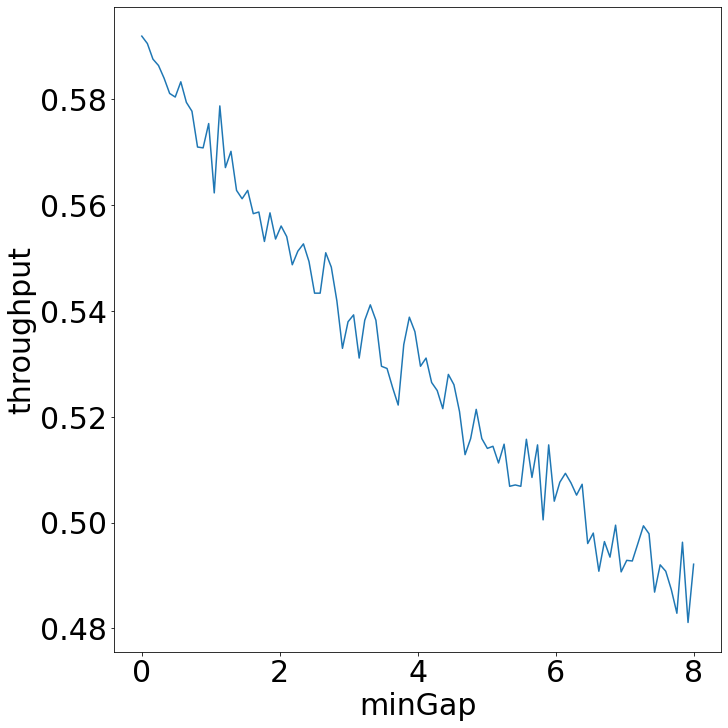

In [6]:
fig, ax = plt.subplots(figsize=(10, 10), layout='constrained')

plt.rcParams['font.size'] = '30'
ax.plot(X, Y)
ax.set_xlabel('minGap')
ax.set_ylabel('throughput')


In [ ]:
# simple optimization

bounds = (, )

sol = sc.optimize.dual_annealing(loss, bounds=[bounds], args=['road', inflow], maxiter=200)
ans = sol.x

In [ ]:
# smart ml optimization?